In [10]:
%matplotlib notebook

import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


def onclick(event):
    """
    Fonction permettant de positionner les interfaces du capillaire avec un clic de la souris
    :param event:
    :return:
    """
    tx = 'coord: x=%.2f, y=%.2f' % (event.xdata, event.ydata)
    text.set_text(tx)
    coords.append([event.xdata, event.ydata])

Le format de l'image est (x:512, y:512, z:576)


<IPython.core.display.Javascript object>


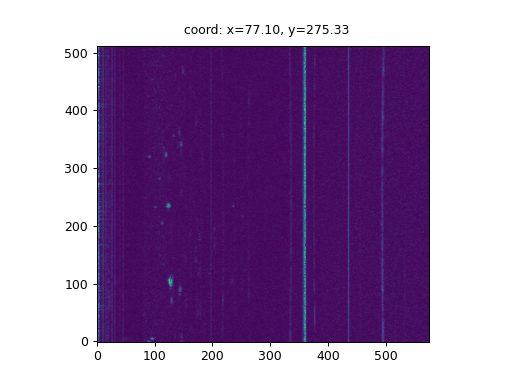

In [11]:
# get image (z: axe de propagation laser, y: axe de rotation capillaire, x: axe perpendiculaire
# a la rotation capillaire)
path_image = "data/data_test_oct_billes_0_degree.nii"
image = nib.load(path_image)
# extraire le format de l'image
nx, ny, nz = image.shape
print("Le format de l'image est (x:{}, y:{}, z:{})".format(nx, ny, nz))
# extraire un b_scan avec plan 'zy'
data = image.get_fdata()
x_tube = 310
b_scan = data[:, x_tube, :]

global coords
coords = []
    
fig = plt.figure("cliquer sur les parois sup puis inf et fermer")
ax = fig.add_subplot(111)
ax.imshow(b_scan, origin="lower")
text = ax.text(150,550, "", va="top", ha="left")
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [3]:
# Entrée des coordonnées des parois
    # Image 0 degrés
    # Paroi intérieure supérieure
x_0_sup = coords[0][0]
z_0_sup = coords[0][1] 
    # Paroi intérieure inférieure
x_0_inf = coords[1][0]
z_0_inf = coords[1][1]

Le format de l'image est (x:512, y:512, z:576)


<IPython.core.display.Javascript object>


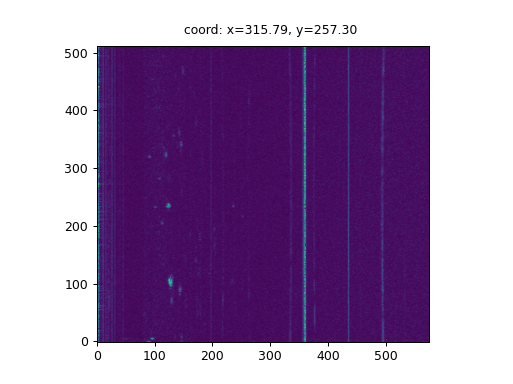

In [4]:
path_image = "data/data_test_oct_billes_0_degree.nii"
image = nib.load(path_image)
nx, ny, nz = image.shape
print("Le format de l'image est (x:{}, y:{}, z:{})".format(nx, ny, nz))
# extraire un b_scan avec plan 'zy'
data = image.get_fdata()
x_tube = 310
b_scan = data[:, x_tube, :]

global coords
coords = []
    
fig = plt.figure("cliquer sur les parois sup puis inf et fermer 2")
ax = fig.add_subplot(111)
ax.imshow(b_scan, origin="lower")
text = ax.text(150,550, "", va="top", ha="left")
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [5]:
# Entrée des coordonnées des parois 
    # Image 180 degrés
    # Paroi intérieure supérieure
x_180_sup = coords[0][0]
z_180_sup = coords[0][1]
    # Paroi intérieure inférieure
x_180_inf = coords[1][0]
z_180_inf = coords[1][1]

In [6]:
# Calcul du point milieu 0 degrés 
x_0_milieu = x_0_inf + (x_0_sup - x_0_inf)/2
z_0_milieu = z_0_inf + (z_0_sup - z_0_inf)/2

# Calcul du point milieu 180 degrés 
x_180_milieu = x_180_inf + (x_180_sup - x_180_inf)/2
z_180_milieu = z_180_inf + (z_180_sup - z_180_inf)/2

In [7]:
# Calcul de la distance de désaxage
deltaX = 3.91 # en um
deltaZ = 6.53 # en um

desaxage = np.sqrt(((x_0_milieu-x_180_milieu)*deltaX)**2+((z_0_milieu-z_180_milieu)*deltaZ)**2)/2

print('Le désaxage de capillaire est de', desaxage, 'um.')

Le désaxage de capillaire est de 206.1520545035802 um.
